In [1]:
#A1
import pandas as pd
import numpy as np

# Load the data
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
}

df = pd.DataFrame(data)

def entropy(class_column):
    """Calculate the entropy of a column."""
    probs = class_column.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs + 1e-9))  # Add small value to avoid log(0)

# Calculate overall entropy
overall_entropy = entropy(df['buys_computer'])

# Calculate entropy for each feature
def calculate_feature_entropy(df, feature):
    """Calculate the weighted entropy for a feature."""
    values = df[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        weighted_entropy += (len(subset) / len(df)) * entropy(subset['buys_computer'])
    return weighted_entropy

features = ['age', 'income', 'student', 'credit_rating']
entropies = {feature: calculate_feature_entropy(df, feature) for feature in features}

# Calculate Information Gain
information_gains = {feature: overall_entropy - entropies[feature] for feature in features}

# Identify the best feature
best_feature = max(information_gains, key=information_gains.get)
print(f"Best feature to split on: {best_feature}")


Best feature to split on: student


In [2]:
#A2
from sklearn.tree import DecisionTreeClassifier

# Prepare data
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Initialize and fit the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Get training set accuracy and tree depth
training_accuracy = model.score(X, y)
tree_depth = model.get_depth()

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Tree Depth: {tree_depth}")


Training Set Accuracy: 1.0
Tree Depth: 3


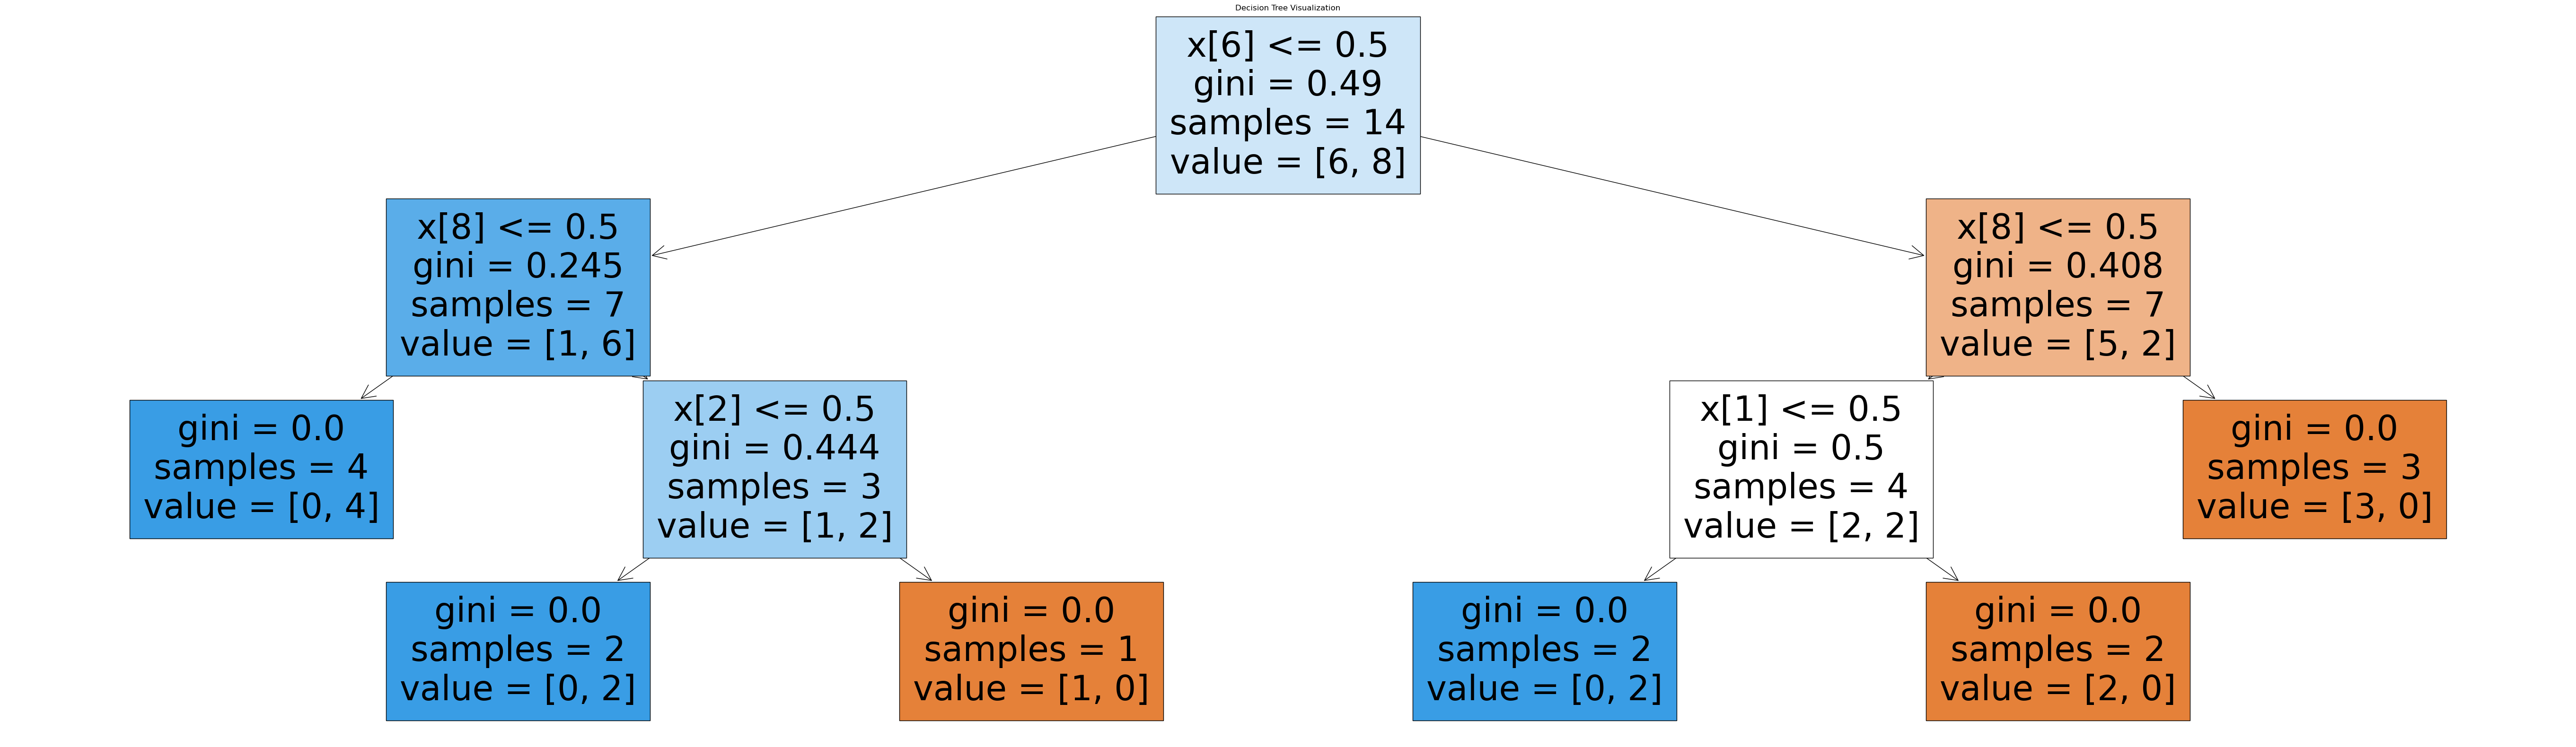

In [3]:
#A3
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.title("Decision Tree Visualization")
plt.show()


Training Set Accuracy: 1.0
Test Set Accuracy: 0.6666666666666666


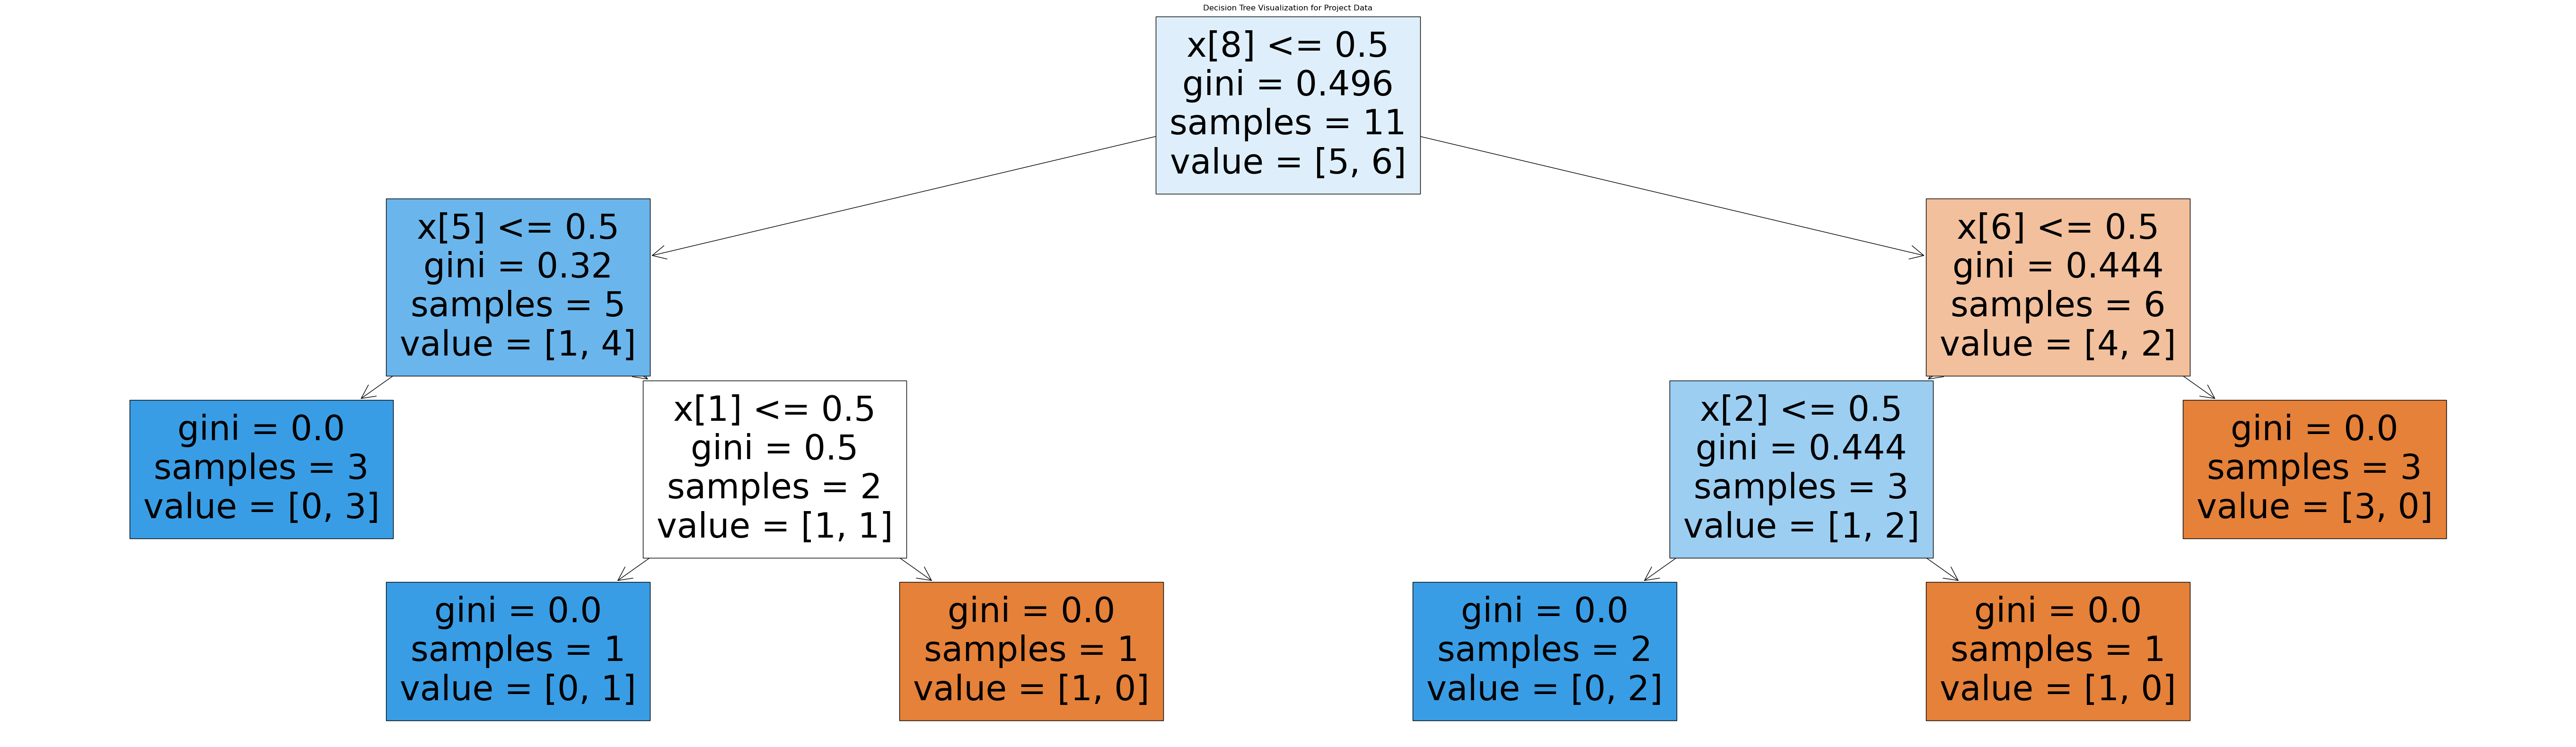

In [4]:
#A4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Define the data as a DataFrame
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
})

# Separate features and target variable
X = data.drop('buys_computer', axis=1)
y = data['buys_computer']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate accuracies
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Visualize the tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.title("Decision Tree Visualization for Project Data")
plt.show()


Training Set Accuracy with Max Depth: 1.0
Test Set Accuracy with Max Depth: 1.0


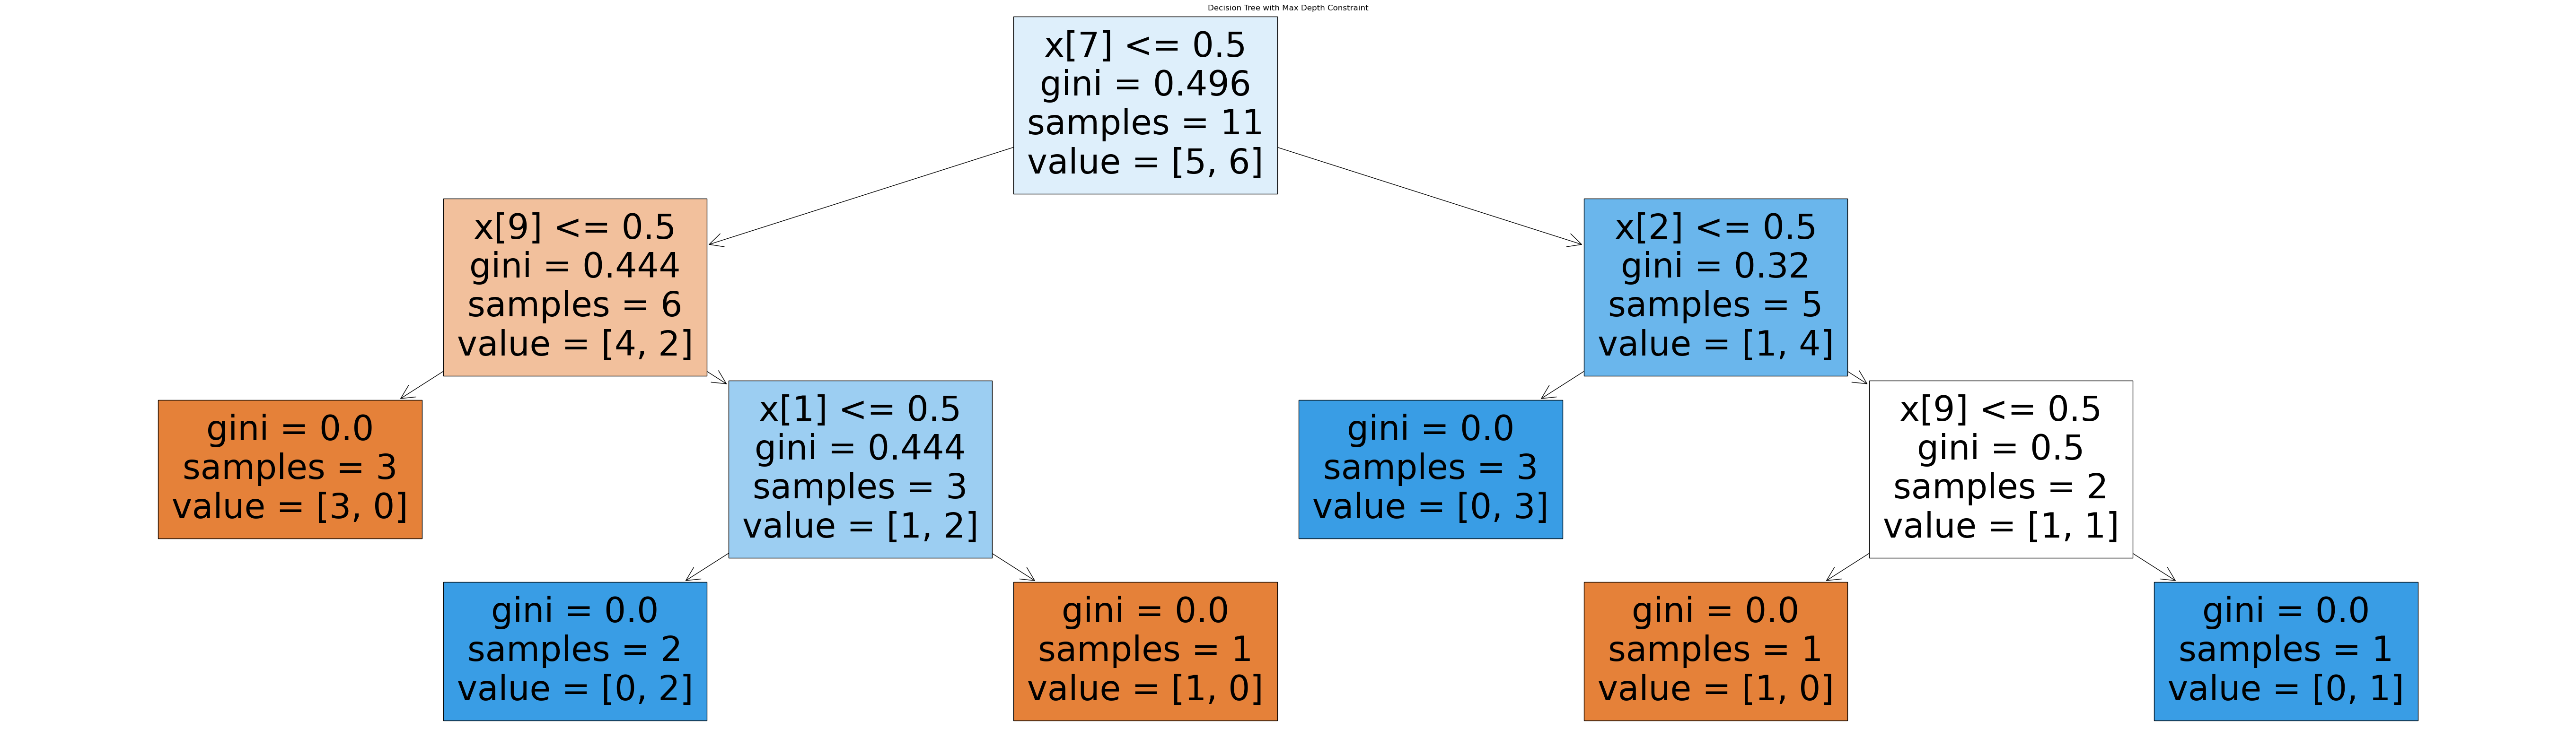

In [5]:
#A5
# Initialize and fit the model with max depth constraint
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)

# Calculate accuracies
train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy with Max Depth: {train_accuracy}")
print(f"Test Set Accuracy with Max Depth: {test_accuracy}")

# Visualize the tree
plt.figure(figsize=(70, 20))
plot_tree(model, filled=True)
plt.title("Decision Tree with Max Depth Constraint")
plt.show()


Training Set Accuracy (Entropy): 1.0
Test Set Accuracy (Entropy): 0.6666666666666666


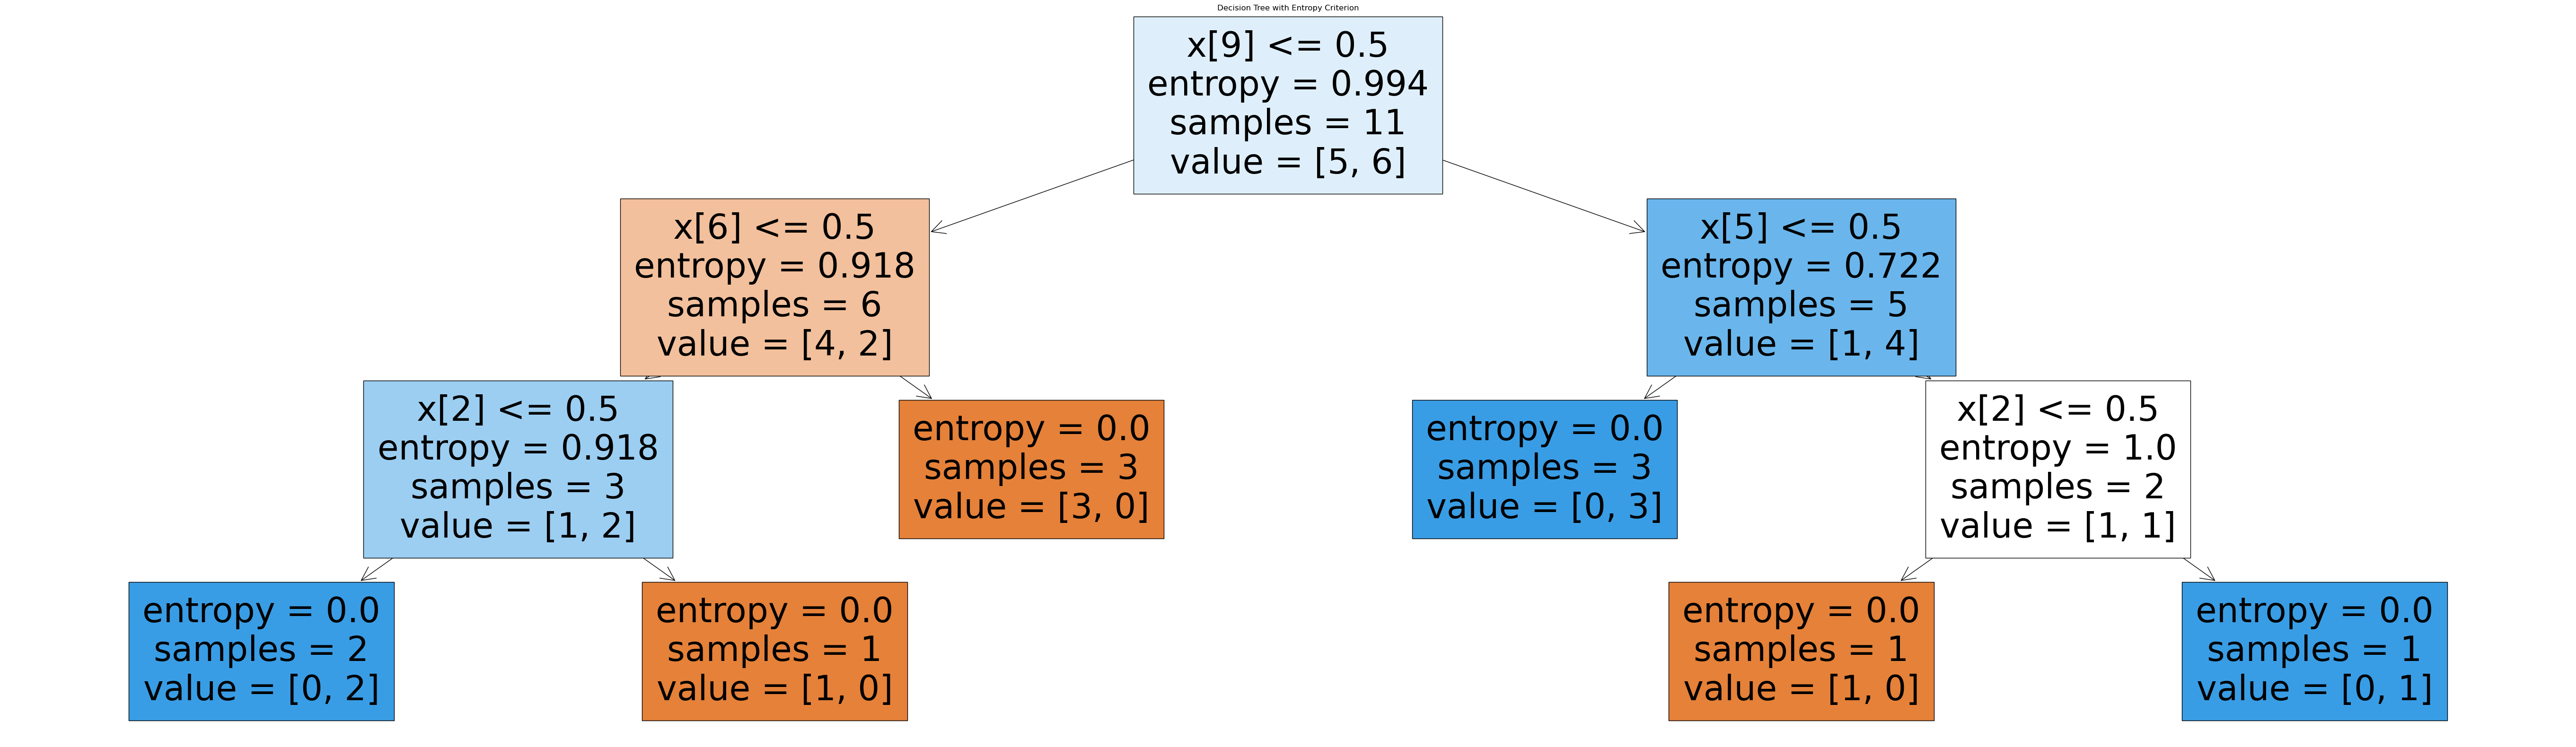

Training Set Accuracy (Default): 1.0
Test Set Accuracy (Default): 1.0


In [6]:
#A6
# Initialize and fit the model using entropy as the criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")
model_entropy.fit(Tr_X, Tr_y)

# Calculate accuracies
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f"Training Set Accuracy (Entropy): {train_accuracy_entropy}")
print(f"Test Set Accuracy (Entropy): {test_accuracy_entropy}")

# Visualize the tree
plt.figure(figsize=(70, 20))
plot_tree(model_entropy, filled=True)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

# Compare with default criterion
print(f"Training Set Accuracy (Default): {train_accuracy}")
print(f"Test Set Accuracy (Default): {test_accuracy}")
